### Storytelling Data Visualization on Exchange Rates

There are two types of data visualization:
 * Exploratory data visualization: we create graphs for ourselves to better understand and explore data.
 * Explanatory data visualization: we create graphs for others to inform, make a point, or tell a story.

Throughout the Project, we focused on explanatory data visualization and learned the following:

* How to use information design principles (familiarity and maximizing the data-ink ratio) to create better graphs for an audience.
* About the elements of a story and how to create storytelling data visualizations using Matplotlib.
* How to guide the audience's attention with pre-attentive attributes.
* How to use Matplotlib built-in styles — with a case study on the FiveThirtyEight style.

In [94]:
# Importing Liabraries
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
import matplotlib.style as style

warnings.filterwarnings("ignore")

In [44]:
# Read the CSV file
df = pd.read_csv("euro-daily-hist_1999_2022.csv")

In [45]:
# Check the Data Shape
df.shape

(6456, 41)

In [46]:
df.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-12-15,1.6324,1.9558,5.4085,1.4653,0.9488,7.7812,NaN,24.477,7.4556,...,4.9710,NaN,11.2125,1.456,NaN,NaN,38.119,31.7965,1.0946,19.9801
1,2023-12-14,1.6288,1.9558,5.3349,1.4677,0.949,7.7866,NaN,24.408,7.4566,...,4.9712,NaN,11.18,1.4527,NaN,NaN,38.146,31.6673,1.0919,20.2693
2,2023-12-13,1.6452,1.9558,5.3609,1.4644,0.9452,7.7426,NaN,24.476,7.4566,...,4.9738,NaN,11.277,1.449,NaN,NaN,38.612,31.3399,1.0787,20.587
3,2023-12-12,1.6398,1.9558,5.3327,1.4656,0.9443,7.7447,NaN,24.42,7.4569,...,4.9732,NaN,11.2815,1.4479,NaN,NaN,38.543,31.3765,1.0804,20.4297
4,2023-12-11,1.642,1.9558,5.3169,1.4609,0.9478,7.7206,NaN,24.367,7.4563,...,4.9707,NaN,11.297,1.4454,NaN,NaN,38.402,31.1872,1.0757,20.5441


In [47]:
# Check the Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6456 non-null   object 
 1   [Australian dollar ]      6456 non-null   object 
 2   [Bulgarian lev ]          6054 non-null   object 
 3   [Brazilian real ]         6188 non-null   object 
 4   [Canadian dollar ]        6456 non-null   object 
 5   [Swiss franc ]            6456 non-null   object 
 6   [Chinese yuan renminbi ]  6188 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6456 non-null   object 
 9   [Danish krone ]           6456 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6456 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6456 non-null   object 
 14  [Croatia

In [23]:
# We are comparing Euro to dollar, First we rename the US Dollar and Period of time column name
df.columns
df.rename(columns={'[US dollar ]': 'US_dollar', 'Period\\Unit:' : 'Time'}, inplace= True)

In [26]:
# change Time column type to datetime
df['Time'] = pd.to_datetime(df["Time"])

In [28]:
# Sort the values By Time
df.sort_values("Time", inplace= True)

In [29]:
df.head(2)

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
6455,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
6454,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


In [34]:
# Extract the column in which we are Working and make a copy 
euro_to_dollar = df[["Time", "US_dollar"]].copy()
euro_to_dollar["US_dollar"].value_counts()

-         62
1.2276     9
1.1215     8
1.0888     7
1.0868     7
          ..
1.4304     1
1.4350     1
1.4442     1
1.4389     1
1.0804     1
Name: US_dollar, Length: 3769, dtype: int64

In [43]:
# We see the above - appear 62 times in our dataset so we don't need it let's remove it
euro_to_dollar = euro_to_dollar[euro_to_dollar["US_dollar"] != '-']
# Change US_dollar type in Float
euro_to_dollar["US_dollar"] = euro_to_dollar["US_dollar"].astype(float)
# check the Info
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6394 entries, 6455 to 0
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       6394 non-null   datetime64[ns]
 1   US_dollar  6394 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 149.9 KB


### Rolling Mean

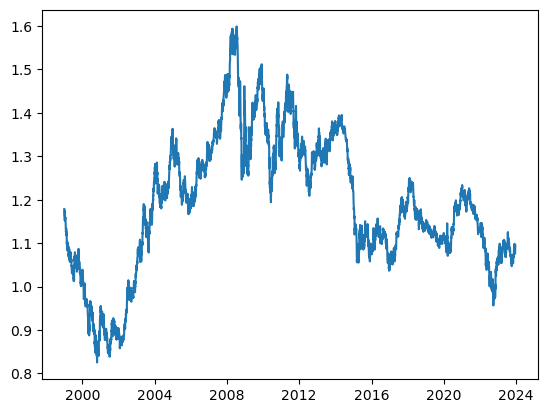

In [49]:
plt.plot(euro_to_dollar["Time"], euro_to_dollar["US_dollar"])
plt.show()

Examining the line's configuration reveals numerous subtle fluctuations rather than presenting a seamless curve. These fluctuations signify the daily variations in the exchange rate, illustrating recurrent ups and downs. Notably, the rate exhibits distinct upward or downward trends over more extended periods, such as months or years.

However, depending on our objectives, displaying this daily variation may be unnecessary. To emphasize only the enduring trends and obscure the daily fluctuations, we can employ the rolling mean, also recognized as the moving average.

In [52]:
# Create an empty DataFrame
values = pd.DataFrame()
# Store the values between 1-20 
values["daily_values"] = pd.Series(range(1,20, 2))
values

,daily_values
0,1
1,3
2,5
3,7
4,9
5,11
6,13
7,15
8,17
9,19


In [56]:
# Calculate the rolling mean with a window size of 2 for the "daily_values" column
values["rolling_mean_2"] = values["daily_values"].rolling(window=2).mean()
values

,daily_values,rolling_mean_2
0,1,NaN
1,3,2.0
2,5,4.0
3,7,6.0
4,9,8.0
5,11,10.0
6,13,12.0
7,15,14.0
8,17,16.0
9,19,18.0


In [58]:
# Calculate the rolling mean with a window size of 3 for the "daily_values" column
values["rolling_mean_3"] = values["daily_values"].rolling(3).mean()
# Calculate the rolling mean with a window size of 5 for the "daily_values" column
values["rolling_mean_5"] = values["daily_values"].rolling(5).mean()
values

,daily_values,rolling_mean_2,rolling_mean_3,rolling_mean_5
0,1,NaN,NaN,NaN
1,3,2.0,NaN,NaN
2,5,4.0,3.0,NaN
3,7,6.0,5.0,NaN
4,9,8.0,7.0,5.0
5,11,10.0,9.0,7.0
6,13,12.0,11.0,9.0
7,15,14.0,13.0,11.0
8,17,16.0,15.0,13.0
9,19,18.0,17.0,15.0


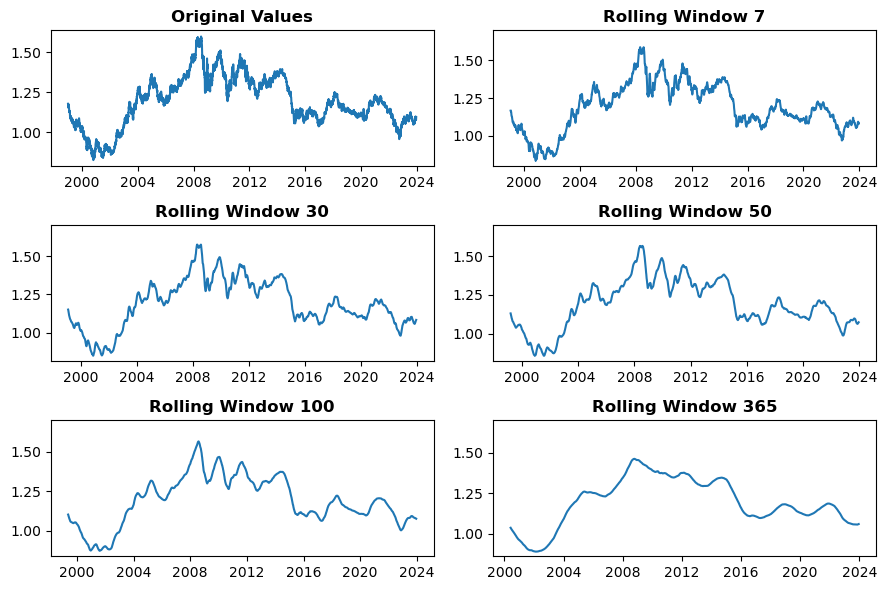

In [84]:
# Set up a subplot layout with six panels to analyze original values and rolling means
plt.figure(figsize=(9, 6))

# Panel 1: Original Values
plt.subplot(3, 2, 1)
plt.plot(euro_to_dollar["Time"], euro_to_dollar['US_dollar'])
plt.title("Original Values", weight="bold")

# Panels 2-6: Rolling Means with Different Window Sizes
for i, rolling_mean in zip([2, 3, 4, 5, 6], [7, 30, 50, 100, 365]):
    plt.subplot(3, 2, i)
    plt.plot(euro_to_dollar["Time"], euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title("Rolling Window " + str(rolling_mean), weight='bold')
    plt.ylim(top= 1.70) # Adjust the y-axis limits 
    
# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

### Coming up with an idea

Here are several compelling story ideas derived from our data analysis:

Navigating the Waves: Euro-Dollar Rate Amid the COVID-19 Pandemic
- Explore the dynamic shifts in the euro-dollar rate throughout the COVID-19 pandemic, utilizing 2020 as a focal point and establishing a baseline with data from 2016 to 2019. Visualize these trends through an insightful line plot.

Riding the Financial Storm: Euro-Dollar Rate During the 2007-2008 Financial Crisis
- Unearth the historical context of the euro-dollar rate during the tumultuous 2007-2008 financial crisis, juxtaposing data from 2006 and 2009 for a comprehensive comparison. Convey this narrative through an illuminating line plot.

Presidential Impact: Euro-Dollar Rate Across Administrations
- Investigate the fluctuations in the euro-dollar rate under the leadership of the last three U.S. presidents—George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021). Present a comparative analysis using a line plot to highlight distinct trends across these presidential terms.

### Financial Crises

In [85]:
euro_to_dollar['rolling_mean'] = euro_to_dollar["US_dollar"].rolling(30).mean()
euro_to_dollar

,Time,US_dollar,rolling_mean
6455,1999-01-04,1.1789,NaN
6454,1999-01-05,1.1790,NaN
6453,1999-01-06,1.1743,NaN
6452,1999-01-07,1.1632,NaN
6451,1999-01-08,1.1659,NaN
...,...,...,...
4,2023-12-11,1.0757,1.080143
3,2023-12-12,1.0804,1.080760
2,2023-12-13,1.0787,1.081593
1,2023-12-14,1.0919,1.082453


In [92]:
# Create a subset of the DataFrame for the financial crisis period (2006-2009)
financial_crises = euro_to_dollar[
    (euro_to_dollar["Time"].dt.year >= 2006) & (euro_to_dollar["Time"].dt.year <= 2009)
].copy()

# financial_crises

financial_crises_7_8 = euro_to_dollar[
    (euro_to_dollar["Time"].dt.year >= 2007) & (euro_to_dollar["Time"].dt.year <= 2008)
].copy()
financial_crises_7_8

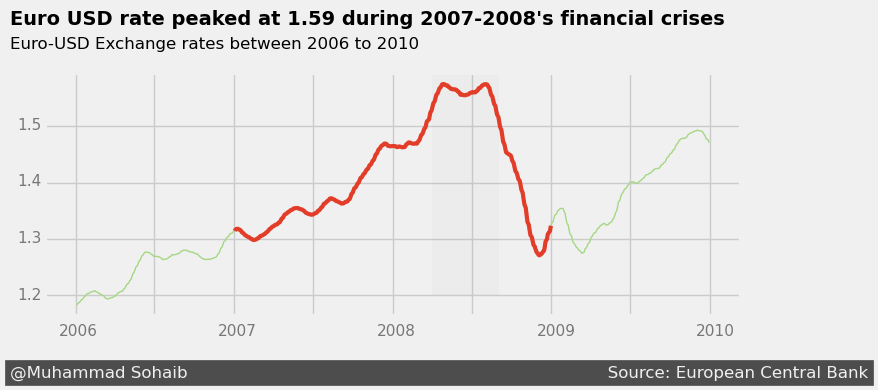

In [111]:
# Applying the "fivethirtyeight" style
style.use("fivethirtyeight")

# Setting up the plot
fig, ax = plt.subplots(figsize=(8, 3))

# Plotting the rolling mean for the financial crisis period
ax.plot(financial_crises["Time"], 
        financial_crises["rolling_mean"],
        linewidth=1, color='#A6D785')

# Highlighting the 2007-2008 period with a thicker line
ax.plot(financial_crises_7_8["Time"], 
        financial_crises_7_8["rolling_mean"],
        linewidth=3, color='#e23d28')

# Formatting x-axis and y-axis labels
ax.set_xticklabels([])
ax.set_yticklabels([])

# Adding year annotations along the x-axis
x = 0.02
for year in ["2006", "2007", "2008", "2009", "2010"]:
    ax.text(x, -0.08, year, alpha=0.5, fontsize=11, transform=plt.gca().transAxes)
    x += 0.22888

# Adding rate annotations along the y-axis
y = 0.07
for rate in ["1.2", "1.3", "1.4", "1.5"]:
    ax.text(-0.04, y, rate, alpha=0.5, fontsize=11, transform=plt.gca().transAxes)
    y += 0.2333

# Adding title and subtitle
ax.text(-0.05, 1.2, "Euro USD rate peaked at 1.59 during 2007-2008's financial crises",
        weight="bold", transform=plt.gca().transAxes)
ax.text(-0.05, 1.1, "Euro-USD Exchange rates between 2006 to 2010 ",
        size=12, transform=plt.gca().transAxes)

# Adding a signature with source information
ax.text(-0.05, -0.25, "@Muhammad Sohaib" + " " * 80 + "Source: European Central Bank",
        color="#f0f0f0", backgroundcolor='#4d4d4d',
        size=12, transform=plt.gca().transAxes)

# Adding a shaded region for the 2007-2008 period
ax.axvspan(xmin=pd.to_datetime("2008-04-01"), xmax=pd.to_datetime("2008-09-01"), ymin=0.09,
           alpha=0.03, color='grey')

# Display the plot
plt.show()

### COVID-19

In [123]:
# Create a subset of the DataFrame for the corona crisis period 2020
corona_crises_20 = euro_to_dollar[
    (euro_to_dollar["Time"] >= '2020-01-01') & (euro_to_dollar["Time"] <= '2020-12-31')
].copy()

# corona_crises_20

corona_crises = euro_to_dollar[
    (euro_to_dollar["Time"] >= '2016-01-01') & (euro_to_dollar["Time"] <= '2019-12-31')
].copy()
# corona_crises

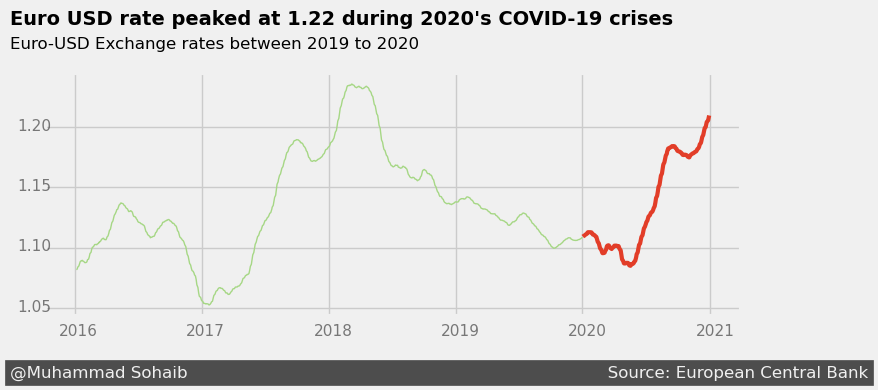

In [124]:
# Applying the "fivethirtyeight" style
style.use("fivethirtyeight")

# Setting up the plot
fig, ax = plt.subplots(figsize=(8, 3))

# Plotting the rolling mean for the corona crisis period
ax.plot(corona_crises["Time"], 
        corona_crises["rolling_mean"],
        linewidth=1, color='#A6D785')

# Highlighting the 2019-2020 period with a thicker line
ax.plot(corona_crises_20["Time"], 
        corona_crises_20["rolling_mean"],
        linewidth=3, color='#e23d28')

# Formatting x-axis and y-axis labels
ax.set_xticklabels([])
ax.set_yticklabels([])

# Adding year annotations along the x-axis
x = 0.02
for year in ["2016", "2017", "2018", "2019", "2020", "2021"]:
    ax.text(x, -0.08, year, alpha=0.5, fontsize=11, transform=plt.gca().transAxes)
    x += 0.183

# Adding rate annotations along the y-axis
y = 0.02
for rate in ["1.05", "1.10", "1.15", "1.20"]:
    ax.text(-0.04, y, rate, alpha=0.5, fontsize=11, transform=plt.gca().transAxes)
    y += 0.248

# Adding title and subtitle
ax.text(-0.05, 1.2, "Euro USD rate peaked at 1.22 during 2020's COVID-19 crises",
        weight="bold", transform=plt.gca().transAxes)
ax.text(-0.05, 1.1, "Euro-USD Exchange rates between 2019 to 2020 ",
        size=12, transform=plt.gca().transAxes)

# Adding a signature with source information
ax.text(-0.05, -0.25, "@Muhammad Sohaib" + " " * 80 + "Source: European Central Bank",
        color="#f0f0f0", backgroundcolor='#4d4d4d',
        size=12, transform=plt.gca().transAxes)

# Display the plot
plt.show()

### The Three US Presidencies

In [129]:
all_president = euro_to_dollar[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2021)].copy()

bush = all_president[all_president['Time'].dt.year <2009].copy()

obama = all_president[(all_president['Time'].dt.year >= 2009) & (all_president['Time'].dt.year < 2017)].copy()

trump = all_president[(all_president['Time'].dt.year >= 2017) & (all_president['Time'].dt.year < 2021)].copy()

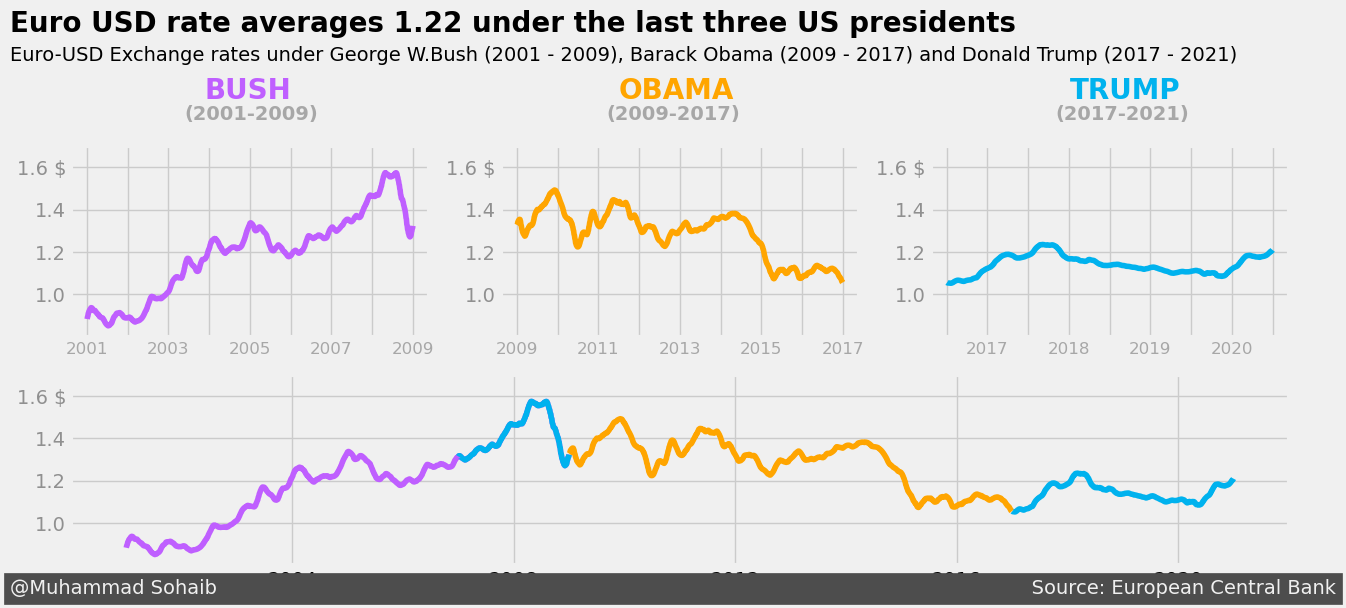

In [159]:
# Applying the "fivethirtyeight" style
style.use("fivethirtyeight")

plt.figure(figsize=(14,8))

# pattern 1
ax1 = plt.subplot(3,3,1)
ax2 = plt.subplot(3,3,2)
ax3 = plt.subplot(3,3,3)

# pattern 2
ax4 = plt.subplot(3,1,2)

axes = [ax1, ax2, ax3, ax4]

# Common changes to all subplots
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2', '1.4', '1.6 $'],
                      alpha= 0.4)
    
# Ax1: Bush

ax1.plot(bush["Time"], bush['rolling_mean'],
        color= "#BF5FFF")

ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '', '2007', '', '2009'],
                   alpha= 0.3, size= 12) 

ax1.text(0.11, 2.45, "BUSH", fontsize= 20, weight= 'bold',
        color= "#BF5FFF" , transform=plt.gca().transAxes)

ax1.text(0.093, 2.34, '(2001-2009)', weight= 'bold',
        alpha= 0.3, transform=plt.gca().transAxes)

# Ax2: Obama
ax2.plot(obama["Time"], obama['rolling_mean'],
        color= "#ffa500")

ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '', '2015', '', '2017'],
                   alpha= 0.3, size= 12) 

ax2.text(0.45, 2.45, "OBAMA", fontsize= 20, weight= 'bold',
        color= "#ffa500" , transform=plt.gca().transAxes)

ax2.text(0.44, 2.34, '(2009-2017)', weight= 'bold',
        alpha= 0.3, transform=plt.gca().transAxes)

# Ax3: Trump
ax3.plot(trump["Time"], trump['rolling_mean'],
        color= "#00B2EE")

ax3.set_xticklabels(['', '2017', '', '2018', '', '2019', '', '2020', '', '2021'],
                   alpha= 0.3, size= 12) 

ax3.text(0.82, 2.45, "TRUMP", fontsize= 20, weight= 'bold',
        color= "#00B2EE" , transform=plt.gca().transAxes)

ax3.text(0.808, 2.34, '(2017-2021)', weight= 'bold',
        alpha= 0.3, transform=plt.gca().transAxes)

# Combined
ax4.plot(bush["Time"], bush["rolling_mean"],
        color= '#BF5FFF')
ax4.plot(obama["Time"], obama["rolling_mean"],
        color= '#ffa500')
ax4.plot(trump["Time"], trump["rolling_mean"],
        color= '#00B2EE')

# Adding title and subtitle
ax1.text(-0.05, 2.8, "Euro USD rate averages 1.22 under the last three US presidents",
        fontsize = 20, weight="bold", transform=plt.gca().transAxes)
ax1.text(-0.05, 2.65, "Euro-USD Exchange rates under George W.Bush (2001 - 2009), Barack Obama (2009 - 2017) and Donald Trump (2017 - 2021)",
        size=14, transform=plt.gca().transAxes)

# Adding a signature with source information
ax.text(-0.05, -0.15, "@Muhammad Sohaib" + " " * 133 + "Source: European Central Bank",
        color="#f0f0f0", backgroundcolor='#4d4d4d',
        size=14, transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

The graph shows the Euro to USD exchange rate averages during the presidencies of George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021). The data source is cited as the European Central Bank. Here are the observations:

- George W. Bush (2001-2009): During Bush's presidency, the Euro to USD exchange rate showed an overall increasing trend. The rate started just above 1.0 USD per Euro and rose to almost 1.6 USD per Euro by the end of his term. There is a sharp increase noticeable after 2005 and a significant drop just before 2009, which could correlate with the financial crisis of 2007-2008.

- Barack Obama (2009-2017): In Obama's tenure, the exchange rate began just under 1.5 USD per Euro. The trend is mostly decreasing over these years, with some periods of volatility. By the end of Obama's term, the exchange rate had fallen to just above 1.0 USD per Euro, which is almost back to the level it was at the start of Bush's presidency.

- Donald Trump (2017-2021): The graph shows relative stability in the exchange rate during Trump's presidency, with rates fluctuating slightly above 1.0 USD per Euro. There's a minor downward trend towards the end, but overall the exchange rate remained quite flat compared to the previous two presidencies.

### Conclusion
+ Over the period covered by the graph, the Euro was strongest against the USD during the latter part of George W. Bush's presidency and weakened over Barack Obama's presidency, reaching levels similar to the start of the graph. During Donald Trump's time in office, the exchange rate remained relatively stable with minor fluctuations around 1.1 to 1.2 USD per Euro. It's important to note that exchange rates are influenced by many factors, including economic policies, global market conditions, and political events, and cannot be attributed to the actions of the president alone.